In [1]:
%run Imports.ipynb

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [128]:
#Target could be raw price value or % of change
def DefineTarget(df, target = "value"):
    df['target_price'] = df['price_close'].shift(-1)
    df['target_percentage'] = ((df['target_price'] / df['price_close'])-1)*100
    if target == "value":
        df['target'] = df['target_price']
    elif target == 'percentage':
        df['target'] = df['target_percentage']
    df = df.drop(columns=['target_price', 'target_percentage'])
    return df

In [206]:
#Load Base data and define date columnt to Datetime
def LoadBaseDatasetWithTarget(target = 'value'):
    df = pd.read_csv('data/cleardata.csv', encoding="utf-16")
    for index, row in df.iterrows():
        df.at[index, 'date'] =  datetime.datetime.strptime(str(row['date']), "%Y-%m-%d %H:%M:%S")
    df = DefineTarget(df, target = target)
    df.drop(df.tail(1).index,inplace=True)
    return df

In [212]:
# define differenced columns , options replace_old for inplace or add diff cols
def LoadDifferencedDatasetWithTarget(replace_old = False, target = 'value'):
    df = LoadBaseDatasetWithTarget(target=target)
    for column in df:
        if column == 'date' or column == 'dayOfWeek_sin' or column == 'dayOfWeek_cos' or column == 'isWeekend' or column == 'target':
            continue
            
        newcolumn = column
        if replace_old == False :
            newcolumn = str(column)+"_d"
        df[newcolumn] = df[column].diff()
    df = df.shift(-1)
    return df

In [214]:
def DefineThreeClasses(df, stay_boundary):
    df['target_rise_fall'] = "Hopla"
    df['target_rise_fall'] = np.where((df.target > stay_boundary),'Rise',df.target_rise_fall)
    df['target_rise_fall'] = np.where((df.target <-(stay_boundary)),'Fall',df.target_rise_fall)
    df['target_rise_fall'] = np.where(((df.target >=-(stay_boundary)) & (df.target <=stay_boundary)),'Stay',df.target_rise_fall)
    df['target'] = df['target_rise_fall']
    df = df.drop(columns=['target_rise_fall'])
    return df

def DefineTwoClasses(df):
    df['target'] = np.where(df['target']>0, 'Rise', 'Fall')
    return df

In [242]:
# define classification Rise/Fall dataset based on percentual change
def LoadBaseDatasetForTwoClass():
    df = LoadBaseDatasetWithTarget(target='percentage')
    df = DefineTwoClasses(df)
    return df

In [243]:
# define classification Rise/Fall dataset based on percentual change
def LoadBaseDatasetForThreeClass(stay_boundary = 0.2):
    df = LoadBaseDatasetWithTarget(target='percentage')
    df = DefineThreeClasses(df, stay_boundary = stay_boundary)
    return df

In [249]:
def LoadDifferencedDatasetForTwoClass(replace_old=False):
    df = LoadDifferencedDatasetWithTarget(replace_old=replace_old, target='percentage')
    df = DefineTwoClasses(df)
    return df

In [250]:
# define classification Rise/Fall dataset based on percentual change
def LoadDifferencedDatasetForThreeClass(replace_old=False, stay_boundary = 0.2):
    df = LoadDifferencedDatasetWithTarget(replace_old=replace_old, target='percentage')
    df = DefineThreeClasses(df, stay_boundary = stay_boundary)
    return df

In [251]:
df = LoadDifferencedDatasetForTwoClass(replace_old=True)

In [252]:
df.head()

,date,noTweets,sum_positive,sum_negative,sum_neutral,sum_compound,avg_sum_positive,avg_sum_negative,avg_sum_neutral,avg_sum_compound,...,oil_price,intel_volume,nvidia_price,nvidia_volume,oil_volume,amd_volume,dayOfWeek_sin,dayOfWeek_cos,isWeekend,target
0,2019-03-27 01:00:00,22.0,-8.514,-3.178,33.686,-38.5770,-0.003730,-0.001778,0.005511,-0.016201,...,-0.012625,-818997.78125,-0.014583,-494130.102083,-124.501917,-3.691053e+06,0.974928,-0.222521,0.0,Rise
1,2019-03-27 02:00:00,-267.0,3.110,-18.122,-252.015,48.0928,0.010788,-0.003869,-0.006960,0.039937,...,-0.012625,-818997.78125,-0.014583,-494130.102083,-124.501917,-3.691053e+06,0.974928,-0.222521,0.0,Rise
2,2019-03-27 03:00:00,-85.0,-2.504,-3.502,-78.978,16.2157,0.002252,-0.000243,-0.002024,0.014951,...,-0.012625,-818997.78125,-0.014583,-494130.102083,-124.501917,-3.691053e+06,0.974928,-0.222521,0.0,Fall
3,2019-03-27 04:00:00,-115.0,-17.567,-4.737,-92.681,-25.7836,-0.002541,-0.000784,0.003303,0.000925,...,-0.012625,-818997.78125,-0.014583,-494130.102083,-124.501917,-3.691053e+06,0.974928,-0.222521,0.0,Rise
4,2019-03-27 05:00:00,123.0,7.571,2.930,112.487,11.9551,-0.002091,-0.000172,0.001857,-0.007312,...,-0.012625,-818997.78125,-0.014583,-494130.102083,-124.501917,-3.691053e+06,0.974928,-0.222521,0.0,Rise


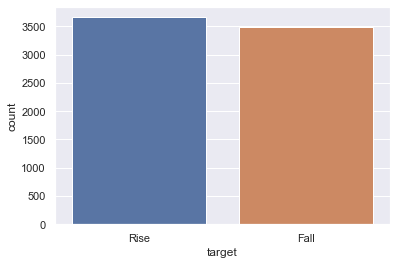

In [253]:
sns.countplot(df.target)